In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
from itertools import combinations

In [ ]:
uploaded = files.upload()

Saving finalfiltered_dataset.csv to finalfiltered_dataset (1).csv
Saving item_ids.json to item_ids (1).json
Saving heroes.json to heroes (1).json


In [ ]:
df = pd.read_csv('finalfiltered_dataset.csv')

<ipython-input-53-e3b9b017c81f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_7_correlations.index, y=top_7_correlations.values, palette='viridis')


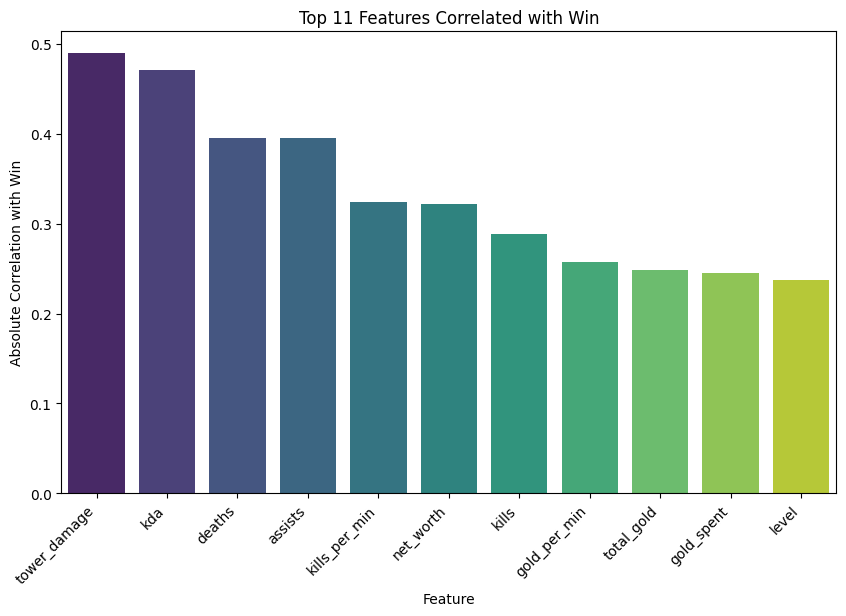

In [ ]:
correlation_matrix = df.corr()

# Extract correlation with 'win' column
correlation_with_win = correlation_matrix['win'].drop('win')  # Drop the 'win' column itself

# Get the top 11 correlations with 'win'
top_7_correlations = correlation_with_win.abs().nlargest(11)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_7_correlations.index, y=top_7_correlations.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 11 Features Correlated with Win')
plt.xlabel('Feature')
plt.ylabel('Absolute Correlation with Win')
plt.show()

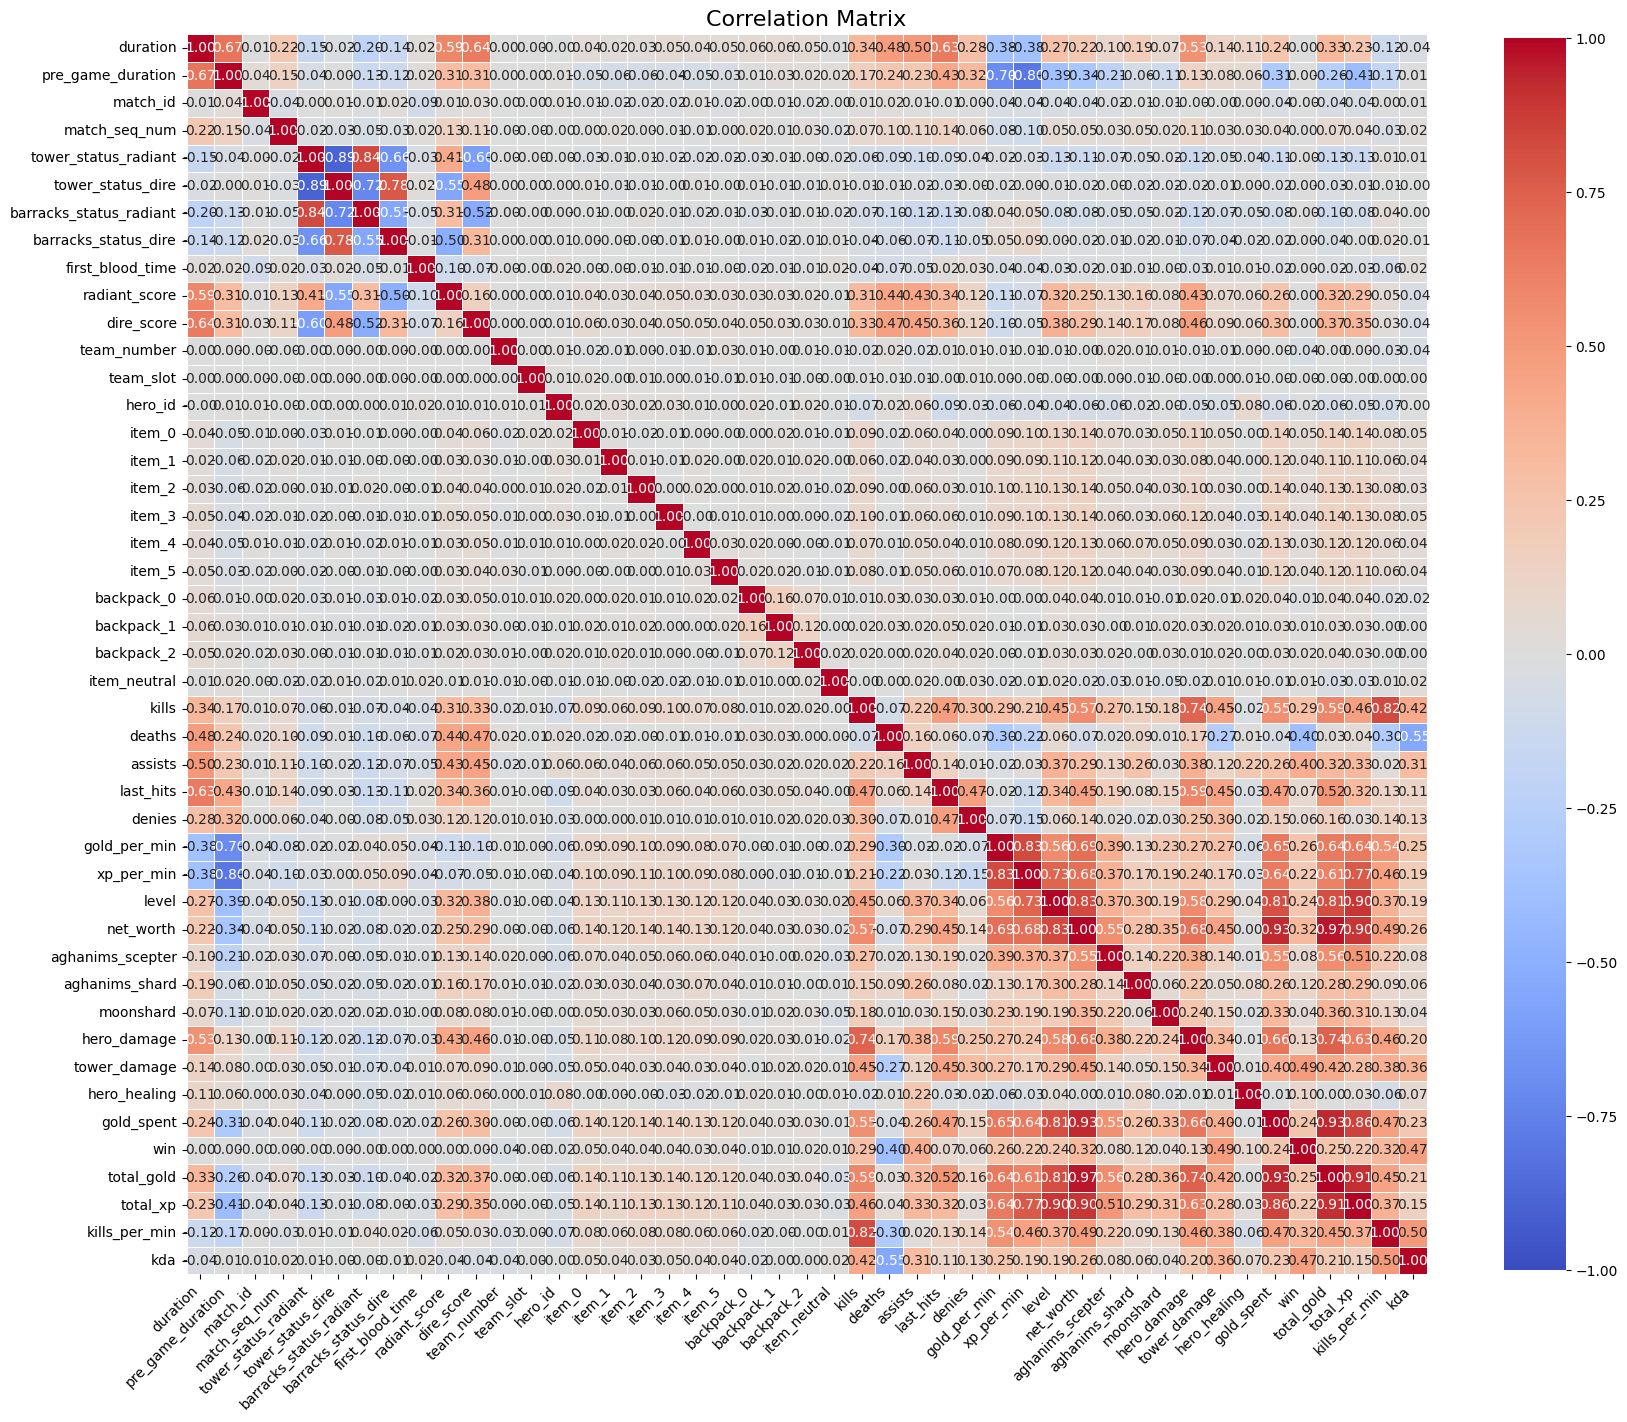

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

label_enc = LabelEncoder()
df['hero_id'] = label_enc.fit_transform(df['hero_id'])
df['win'] = label_enc.fit_transform(df['win'])

In [ ]:
item_columns = ['item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5',
                'backpack_0', 'backpack_1', 'backpack_2', 'item_neutral']
for item_col in item_columns:
    df[item_col] = label_enc.fit_transform(df[item_col])


In [ ]:
feature_cols = ['duration', 'pre_game_duration', 'tower_status_radiant', 'tower_status_dire',
                'barracks_status_radiant', 'barracks_status_dire', 'first_blood_time',
                'radiant_score', 'dire_score', 'kills', 'deaths', 'assists', 'last_hits',
                'denies', 'gold_per_min', 'xp_per_min', 'level', 'net_worth',
                'aghanims_scepter', 'aghanims_shard', 'moonshard', 'hero_damage',
                'tower_damage', 'hero_healing', 'gold_spent', 'total_gold', 'total_xp',
                'kills_per_min', 'kda', 'hero_id'] + item_columns

X = df[feature_cols]
y = df['win']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize Random Forest and Gradient Boosting Classifiers
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [ ]:
# Train both models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predictions for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Predictions for Gradient Boosting
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

In [ ]:
# Evaluation Metrics for Random Forest
print("Random Forest - Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

print("Random Forest - Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf))
print("Random Forest - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

print("Random Forest - Training Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest - Test Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Evaluation Metrics for Gradient Boosting
print("Gradient Boosting - Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Gradient Boosting - Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))

print("Gradient Boosting - Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_gb))
print("Gradient Boosting - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))

print("Gradient Boosting - Training Classification Report:")
print(classification_report(y_train, y_train_pred_gb))
print("Gradient Boosting - Test Classification Report:")
print(classification_report(y_test, y_test_pred_gb))

Random Forest - Training Accuracy: 0.9998706004140787
Random Forest - Test Accuracy: 0.8788819875776398
Random Forest - Training Confusion Matrix:
[[3880    0]
 [   1 3847]]
Random Forest - Test Confusion Matrix:
[[836 114]
 [120 862]]
Random Forest - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      1.00      1.00      3848

    accuracy                           1.00      7728
   macro avg       1.00      1.00      1.00      7728
weighted avg       1.00      1.00      1.00      7728

Random Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       950
           1       0.88      0.88      0.88       982

    accuracy                           0.88      1932
   macro avg       0.88      0.88      0.88      1932
weighted avg       0.88      0.88      0.88      1932

Gradient Boosting 

In [ ]:
# Cross-Validation Scores for both models
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5)

print("Random Forest - Cross-Validation Scores:", cv_scores_rf)
print("Random Forest - Mean Cross-Validation Score:", cv_scores_rf.mean())

print("Gradient Boosting - Cross-Validation Scores:", cv_scores_gb)
print("Gradient Boosting - Mean Cross-Validation Score:", cv_scores_gb.mean())


Random Forest - Cross-Validation Scores: [0.88198758 0.86594203 0.87681159 0.876294   0.85973085]
Random Forest - Mean Cross-Validation Score: 0.8721532091097309
Gradient Boosting - Cross-Validation Scores: [0.89182195 0.87111801 0.87318841 0.88095238 0.87163561]
Gradient Boosting - Mean Cross-Validation Score: 0.8777432712215321


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


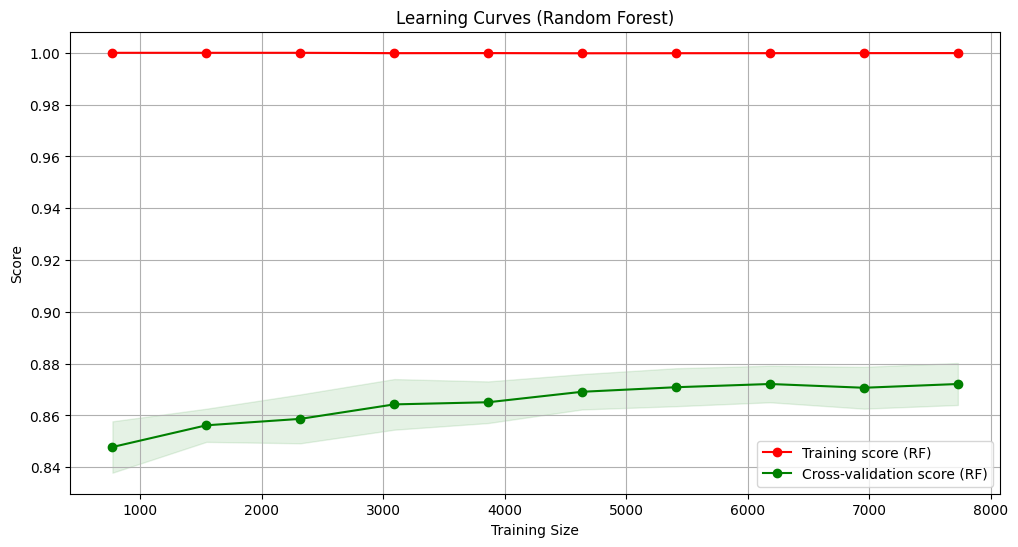

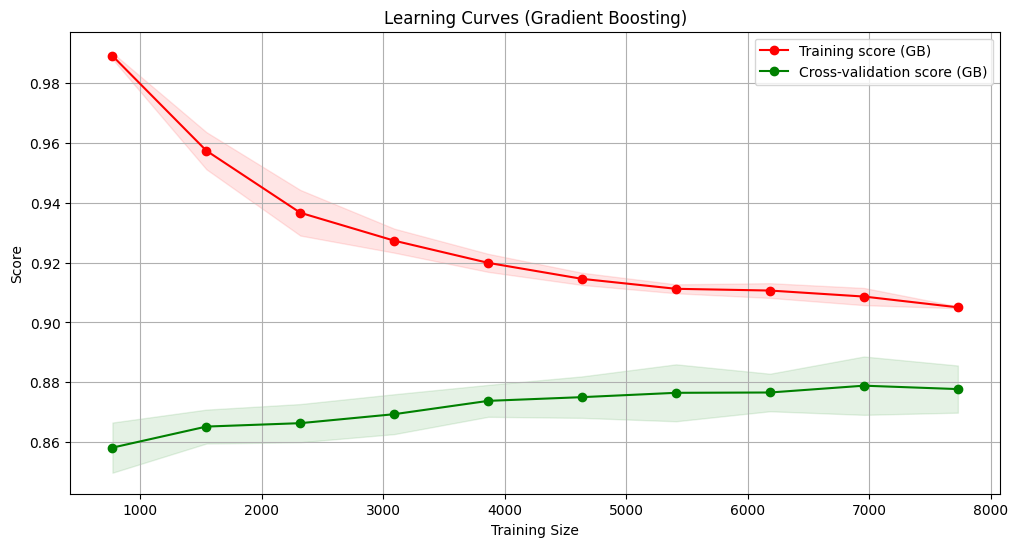

In [ ]:
# Learning Curves for both models
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(
    gb_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Plot Learning Curves for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), 'o-', color='r', label='Training score (RF)')
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), 'o-', color='g', label='Cross-validation score (RF)')
plt.fill_between(train_sizes_rf,
                 np.mean(train_scores_rf, axis=1) - np.std(train_scores_rf, axis=1),
                 np.mean(train_scores_rf, axis=1) + np.std(train_scores_rf, axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes_rf,
                 np.mean(test_scores_rf, axis=1) - np.std(test_scores_rf, axis=1),
                 np.mean(test_scores_rf, axis=1) + np.std(test_scores_rf, axis=1), alpha=0.1, color='g')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves (Random Forest)')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot Learning Curves for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_gb, np.mean(train_scores_gb, axis=1), 'o-', color='r', label='Training score (GB)')
plt.plot(train_sizes_gb, np.mean(test_scores_gb, axis=1), 'o-', color='g', label='Cross-validation score (GB)')
plt.fill_between(train_sizes_gb,
                 np.mean(train_scores_gb, axis=1) - np.std(train_scores_gb, axis=1),
                 np.mean(train_scores_gb, axis=1) + np.std(train_scores_gb, axis=1), alpha=0.1, color='r')
plt.fill_between(train_sizes_gb,
                 np.mean(test_scores_gb, axis=1) - np.std(test_scores_gb, axis=1),
                 np.mean(test_scores_gb, axis=1) + np.std(test_scores_gb, axis=1), alpha=0.1, color='g')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves (Gradient Boosting)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search for Random Forest
randomized_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                                          n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
randomized_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:")
print(randomized_search_rf.best_params_)
print("Best Cross-Validation Score for Random Forest:")
print(randomized_search_rf.best_score_)

# Randomized Search for Gradient Boosting
randomized_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                                          n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
randomized_search_gb.fit(X_train, y_train)

print("Best Parameters for Gradient Boosting:")
print(randomized_search_gb.best_params_)
print("Best Cross-Validation Score for Gradient Boosting:")
print(randomized_search_gb.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 40, 'bootstrap': False}
Best Cross-Validation Score for Random Forest:
0.8755179040178852
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Gradient Boosting:
{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 6, 'learning_rate': 0.1}
Best Cross-Validation Score for Gradient Boosting:
0.8901401256818934


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Refit Random Forest with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=randomized_search_rf.best_params_['n_estimators'],
    min_samples_split=randomized_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=randomized_search_rf.best_params_['min_samples_leaf'],
    max_depth=randomized_search_rf.best_params_['max_depth'],
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Refit Gradient Boosting with the best parameters
best_gb_model = GradientBoostingClassifier(
    n_estimators=randomized_search_gb.best_params_['n_estimators'],
    min_samples_split=randomized_search_gb.best_params_['min_samples_split'],
    min_samples_leaf=randomized_search_gb.best_params_['min_samples_leaf'],
    max_depth=randomized_search_gb.best_params_['max_depth'],
    learning_rate=randomized_search_gb.best_params_['learning_rate'],
    random_state=42
)
best_gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=2, n_estimators=200,
                           random_state=42)

In [ ]:
# Evaluate the best Random Forest model on the test set
y_test_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Evaluate the best Gradient Boosting model on the test set
y_test_pred_gb = best_gb_model.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_test_pred_gb))

Random Forest Test Accuracy: 0.8825051759834368
Random Forest Confusion Matrix:
[[837 113]
 [114 868]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       950
           1       0.88      0.88      0.88       982

    accuracy                           0.88      1932
   macro avg       0.88      0.88      0.88      1932
weighted avg       0.88      0.88      0.88      1932

Gradient Boosting Test Accuracy: 0.894927536231884
Gradient Boosting Confusion Matrix:
[[859  91]
 [112 870]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       950
           1       0.91      0.89      0.90       982

    accuracy                           0.89      1932
   macro avg       0.89      0.90      0.89      1932
weighted avg       0.90      0.89      0.89      1932



In [ ]:
# Compare Feature Importances
feature_importances_rf = best_rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_rf
}).sort_values(by='importance', ascending=False)

feature_importances_gb = best_gb_model.feature_importances_
feature_importance_df_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_gb
}).sort_values(by='importance', ascending=False)


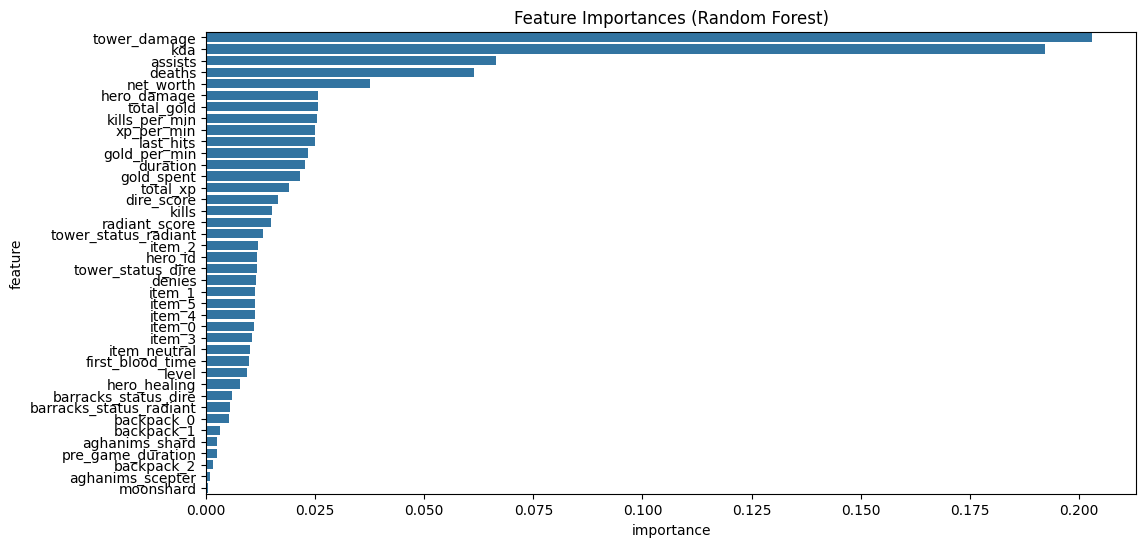

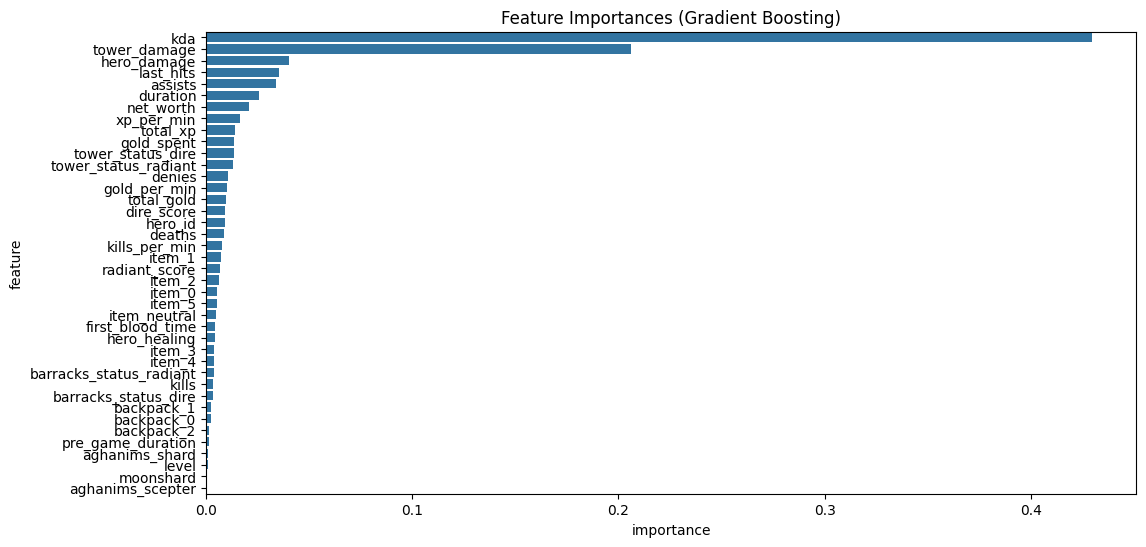

In [ ]:
# Plot feature importances for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_rf)
plt.title('Feature Importances (Random Forest)')
plt.show()

# Plot feature importances for Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_gb)
plt.title('Feature Importances (Gradient Boosting)')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Define the feature columns and target variable
feature_cols = ['duration', 'pre_game_duration', 'tower_status_radiant', 'tower_status_dire',
                'barracks_status_radiant', 'barracks_status_dire', 'first_blood_time',
                'radiant_score', 'dire_score', 'kills', 'deaths', 'assists', 'last_hits',
                'denies', 'gold_per_min', 'xp_per_min', 'level', 'net_worth',
                'aghanims_scepter', 'aghanims_shard', 'moonshard', 'hero_damage',
                'tower_damage', 'hero_healing', 'gold_spent', 'total_gold', 'total_xp',
                'kills_per_min', 'kda', 'hero_id'] + item_columns

X = df[feature_cols]
y = df['win']

# Convert binary classification to numeric values if necessary
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination is an estimate of the proportion of outliers

# Fit the model
iso_forest.fit(X_train)

# Predict anomalies
y_train_pred_iso = iso_forest.predict(X_train)
y_test_pred_iso = iso_forest.predict(X_test)

# Convert predictions to binary labels
y_train_pred_iso = [1 if x == -1 else 0 for x in y_train_pred_iso]  # -1 indicates anomaly
y_test_pred_iso = [1 if x == -1 else 0 for x in y_test_pred_iso]  # -1 indicates anomaly

# Evaluation Metrics for Isolation Forest
print("Isolation Forest - Training Classification Report:")
print(classification_report(y_train, y_train_pred_iso))
print("Isolation Forest - Test Classification Report:")
print(classification_report(y_test, y_test_pred_iso))

print("Isolation Forest - Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_iso))
print("Isolation Forest - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_iso))

Isolation Forest - Training Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.96      0.67      3880
           1       0.64      0.06      0.12      3848

    accuracy                           0.52      7728
   macro avg       0.57      0.51      0.39      7728
weighted avg       0.57      0.52      0.39      7728

Isolation Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.96      0.66       950
           1       0.64      0.06      0.11       982

    accuracy                           0.51      1932
   macro avg       0.57      0.51      0.39      1932
weighted avg       0.57      0.51      0.38      1932

Isolation Forest - Training Confusion Matrix:
[[3740  140]
 [3601  247]]
Isolation Forest - Test Confusion Matrix:
[[916  34]
 [921  61]]


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define parameter grids
contaminations = [0.01, 0.05, 0.1]
n_estimators = [50, 100, 200]
max_samples = [0.5, 1.0]

best_model = None
best_score = -np.inf
best_params = {}

for contamination in contaminations:
    for n in n_estimators:
        for max_sample in max_samples:
            iso_forest = IsolationForest(n_estimators=n, contamination=contamination, max_samples=max_sample, random_state=42)
            iso_forest.fit(X_train)

            # Predict anomalies
            y_train_pred_iso = iso_forest.predict(X_train)
            y_test_pred_iso = iso_forest.predict(X_test)

            # Convert predictions to binary labels
            y_train_pred_iso = [1 if x == -1 else 0 for x in y_train_pred_iso]
            y_test_pred_iso = [1 if x == -1 else 0 for x in y_test_pred_iso]

            # Evaluate model
            test_report = classification_report(y_test, y_test_pred_iso, output_dict=True)
            score = test_report['1']['f1-score']  # or any metric you prefer

            # Update best model
            if score > best_score:
                best_score = score
                best_params = {
                    'contamination': contamination,
                    'n_estimators': n,
                    'max_samples': max_sample
                }
                best_model = iso_forest

print("Best Parameters for Isolation Forest:")
print(best_params)
print("Best F1 Score:", best_score)

Best Parameters for Isolation Forest:
{'contamination': 0.1, 'n_estimators': 50, 'max_samples': 1.0}
Best F1 Score: 0.2184873949579832


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Initialize Isolation Forest with best parameters
best_iso_forest = IsolationForest(n_estimators=50, contamination=0.1, max_samples=1.0, random_state=42)

# Fit the model
best_iso_forest.fit(X_train)

# Predict anomalies
y_train_pred_iso = best_iso_forest.predict(X_train)
y_test_pred_iso = best_iso_forest.predict(X_test)

# Convert predictions to binary labels
y_train_pred_iso = [1 if x == -1 else 0 for x in y_train_pred_iso]
y_test_pred_iso = [1 if x == -1 else 0 for x in y_test_pred_iso]

# Evaluate model
print("Isolation Forest - Test Classification Report:")
print(classification_report(y_test, y_test_pred_iso))
print("Isolation Forest - Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_iso))

Isolation Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.92      0.65       950
           1       0.62      0.13      0.22       982

    accuracy                           0.52      1932
   macro avg       0.57      0.53      0.44      1932
weighted avg       0.57      0.52      0.43      1932

Isolation Forest - Test Confusion Matrix:
[[872  78]
 [852 130]]


In [ ]:
outliers = iso_forest.fit_predict(X)

In [ ]:
# Anomalies are labeled as -1, normal points are labeled as 1
df['anomaly'] = outliers

In [ ]:

# Extract anomalies
anomalies = df[df['anomaly'] == -1]

# Print some details about the anomalies
print("Detected Anomalies:")
print(anomalies[feature_cols + ['hero_id'] + ['anomaly']].head())

# Analyze the performance of detected anomalies
anomalies_summary = anomalies[feature_cols].describe()
print("Anomalies Summary Statistics:")
print(anomalies_summary)

# Analyze the distribution of anomalies by hero_id
anomalies_by_hero = anomalies['hero_id'].value_counts()
print("Anomalies by Hero ID:")
print(anomalies_by_hero)


Detected Anomalies:
    duration  pre_game_duration  tower_status_radiant  tower_status_dire  \
37      2839                 90                     0               1924   
39      2839                 90                     0               1924   
50      2150                 60                   256               1952   
54      2150                 60                   256               1952   
56      2150                 60                   256               1952   

    barracks_status_radiant  barracks_status_dire  first_blood_time  \
37                        2                    63               243   
39                        2                    63               243   
50                       48                    63               176   
54                       48                    63               176   
56                       48                    63               176   

    radiant_score  dire_score  kills  ...  item_2  item_3  item_4  item_5  \
37             33  

In [ ]:
# Compare anomaly heroes' win rate to the general population
anomalies_win_rate = anomalies['win'].mean()
general_win_rate = df['win'].mean()
print(f"Win Rate of Anomalous Heroes: {anomalies_win_rate:.2f}")
print(f"General Win Rate: {general_win_rate:.2f}")

Win Rate of Anomalous Heroes: 0.64
General Win Rate: 0.50


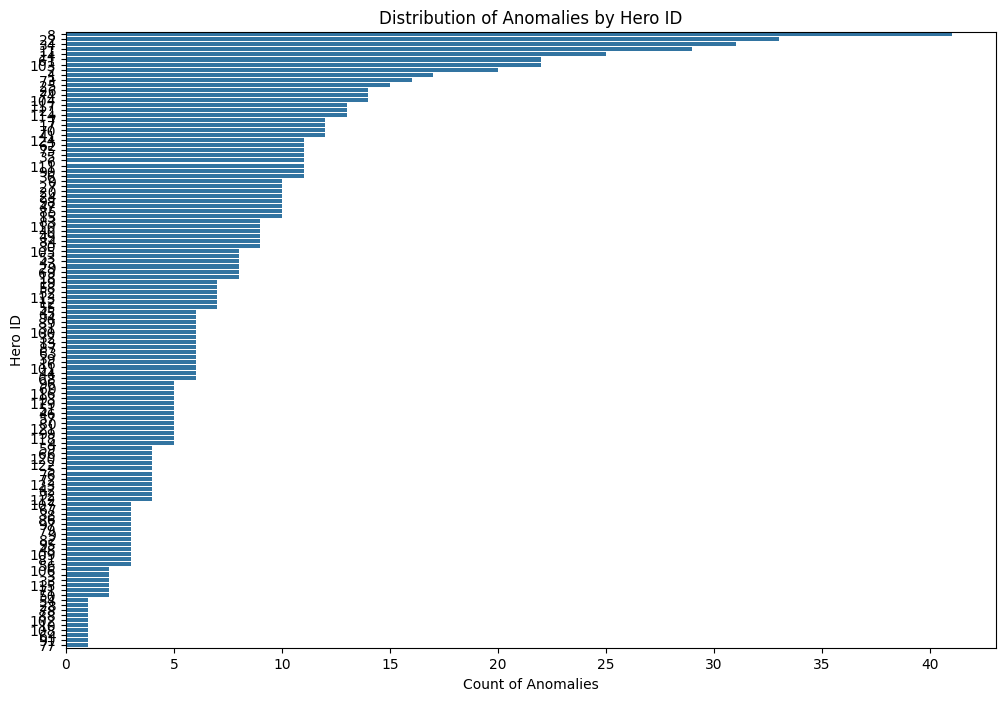

In [ ]:
# Visualize Anomalies by Hero ID
plt.figure(figsize=(12, 8))
sns.countplot(y='hero_id', data=anomalies, order=anomalies['hero_id'].value_counts().index)
plt.title('Distribution of Anomalies by Hero ID')
plt.xlabel('Count of Anomalies')
plt.ylabel('Hero ID')
plt.show()

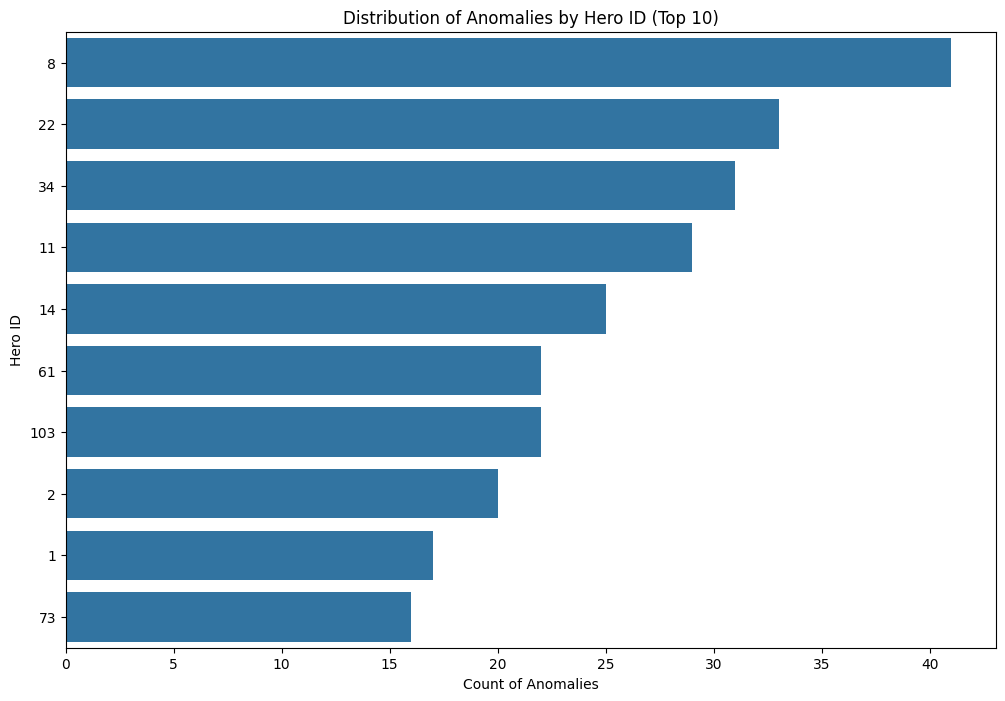

In [ ]:
top_10_heroes = anomalies['hero_id'].value_counts().head(10).index

# Filter anomalies DataFrame to include only the top 10 Hero IDs
top_10_anomalies = anomalies[anomalies['hero_id'].isin(top_10_heroes)]

# Plot the distribution of anomalies by Hero ID for the top 10 heroes
plt.figure(figsize=(12, 8))
sns.countplot(y='hero_id', data=top_10_anomalies, order=top_10_heroes)
plt.title('Distribution of Anomalies by Hero ID (Top 10)')
plt.xlabel('Count of Anomalies')
plt.ylabel('Hero ID')
plt.show()